In [1]:
from scipy import stats
import pandas as pd
pd.options.mode.chained_assignment
import numpy as np
import plotly.express as px
from sklearn.metrics import root_mean_squared_error

In [2]:
# from IPython.display import display, HTML
# display(HTML("<style>.jp-Cell { margin-left: -65% !important; margin-right: -65% !important; }</style>"))

In [4]:
res_read = pd.read_csv('2024-07-01.csv', parse_dates = True)

# Analysis

In [13]:
#res_read1 = res_read[res_read['PointID'] == 'NW-88010015'] #NW-88010015 NW-88005133
res_read["deltaDOC"] = res_read["DOC"] - res_read["Result"]

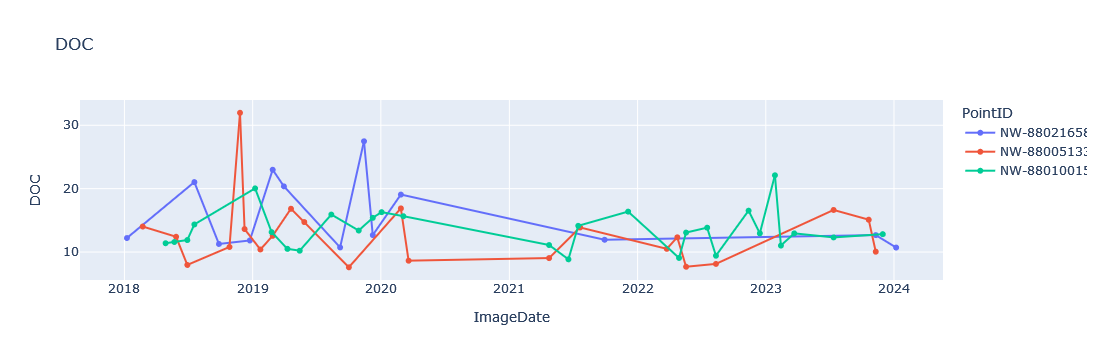

In [14]:
fig = px.line(res_read, x="ImageDate", y="DOC", markers=True, color='PointID', title = "DOC")
fig.show()

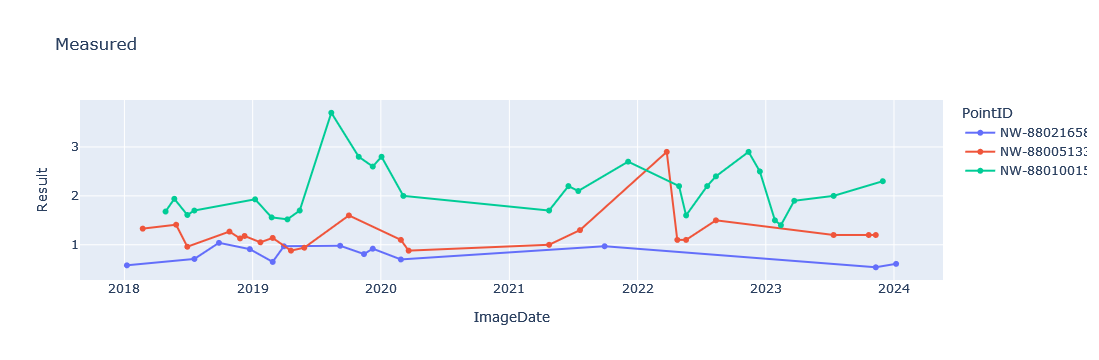

In [15]:
fig = px.line(res_read, x="ImageDate", y="Result", markers=True, color='PointID', title = "Measured")
fig.show()

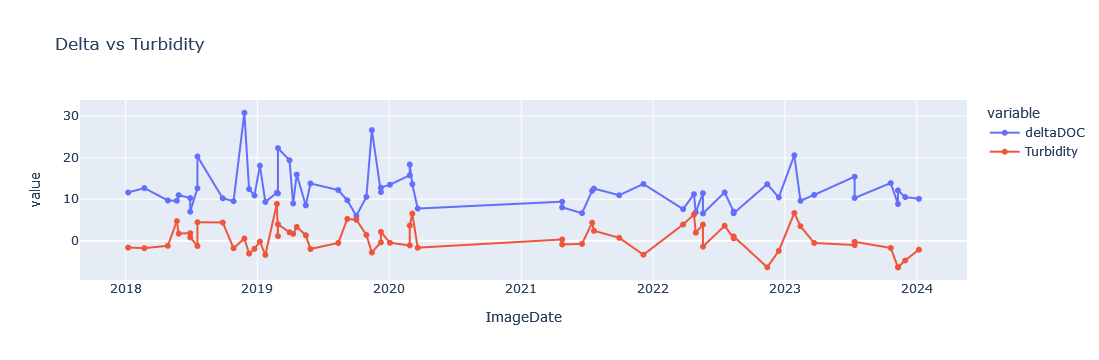

In [16]:
fig = px.line(res_read, x="ImageDate", y=["deltaDOC","Turbidity"], markers=True, title="Delta vs Turbidity")
fig.show()

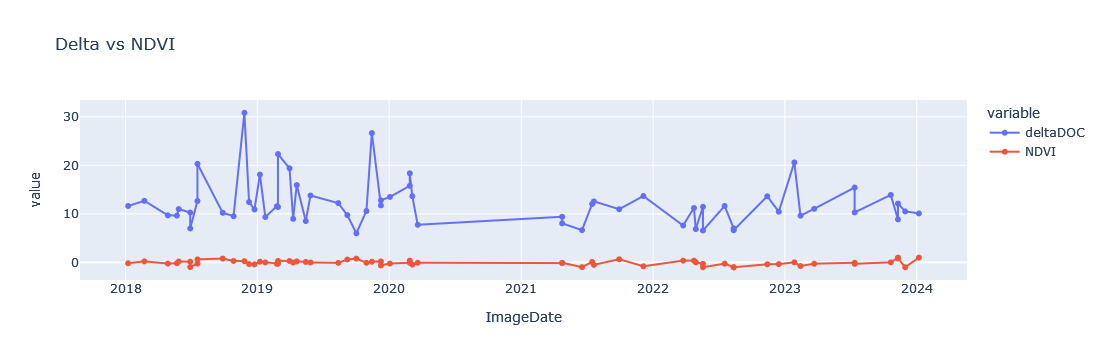

In [17]:
fig = px.line(res_read, x="ImageDate", y=["deltaDOC","NDVI"], markers=True,title="Delta vs NDVI")
fig.show()

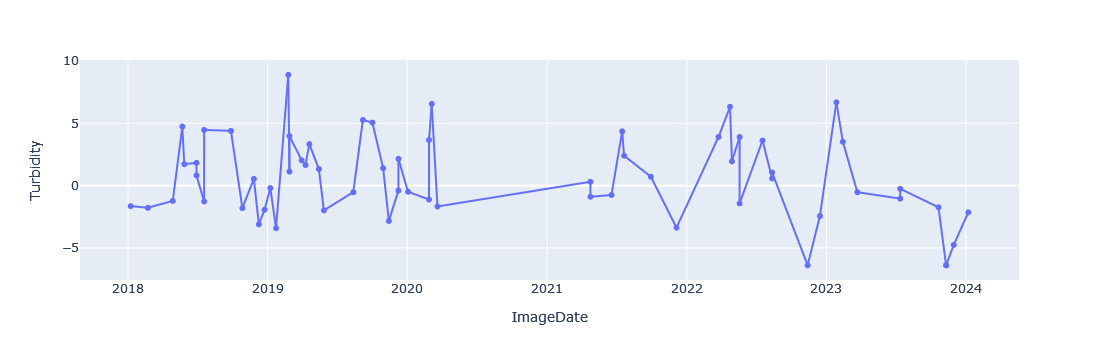

In [18]:
fig = px.line(res_read, x="ImageDate", y="Turbidity", markers=True)
fig.show()

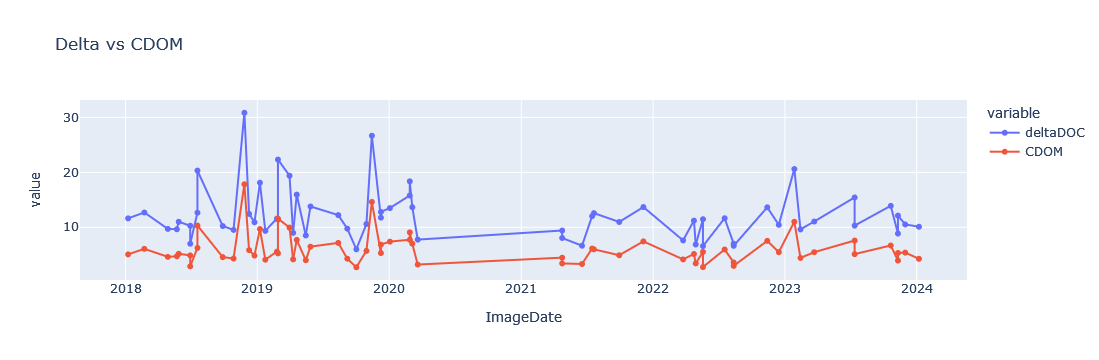

In [19]:
fig = px.line(res_read, x="ImageDate", y=["deltaDOC","CDOM"], markers=True,title="Delta vs CDOM")
fig.show()

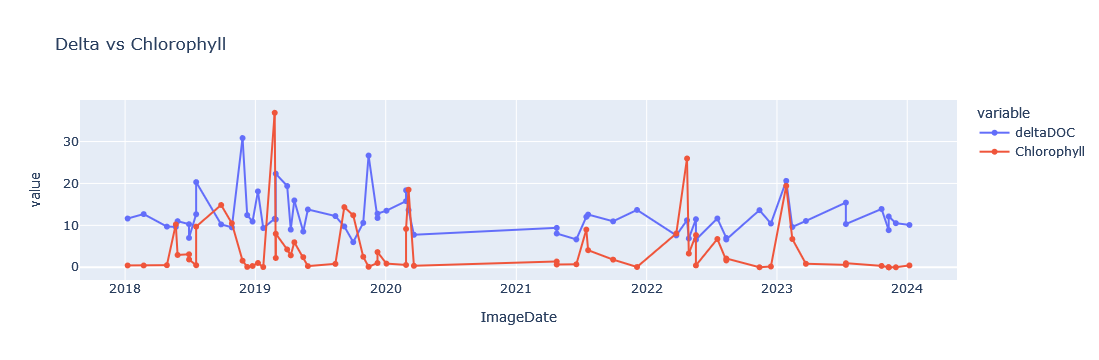

In [20]:
fig = px.line(res_read, x="ImageDate", y=["deltaDOC","Chlorophyll"], markers=True, title="Delta vs Chlorophyll")
fig.show()

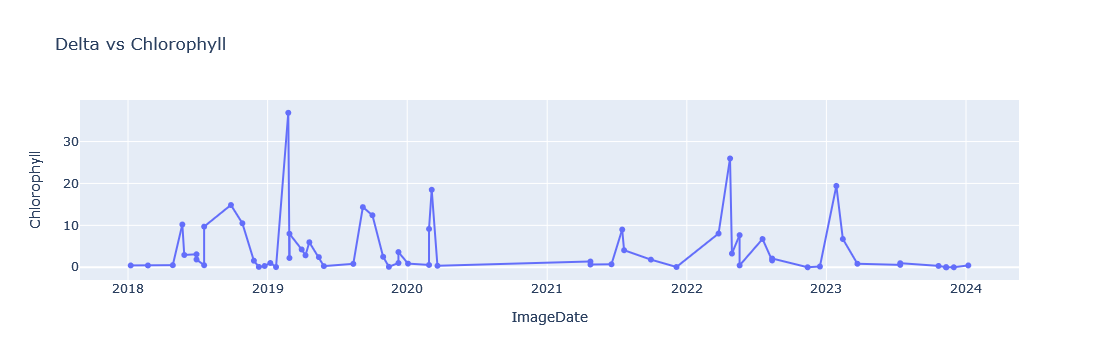

In [21]:
fig = px.line(res_read, x="ImageDate", y="Chlorophyll", markers=True, title="Delta vs Chlorophyll")
fig.show()

# Simple Outlier remove 

In [22]:
res_read = res_read.drop(res_read[res_read["Chlorophyll"] > 50].index)
result_N_O = res_read.drop(res_read[res_read.Turbidity > 20].index)


In [23]:
# from scipy import stats
# df = res_read
# cols = df.select_dtypes('number').columns
# cols = cols[3:8]
# df_sub = df.loc[:, cols]
# iqr = df_sub.quantile(0.75, numeric_only=False) - df_sub.quantile(0.25, numeric_only=False)
# lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22
# df.loc[:, cols] = df_sub.where(lim, np.nan)
# df.dropna(inplace=True)
# result_N_O = df

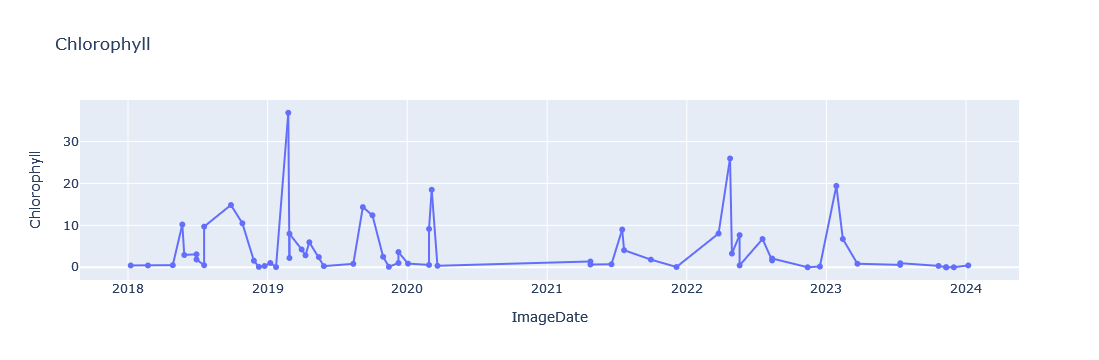

In [26]:
fig = px.line(result_N_O, x="ImageDate", y="Chlorophyll", markers=True, title="Chlorophyll")
fig.show()

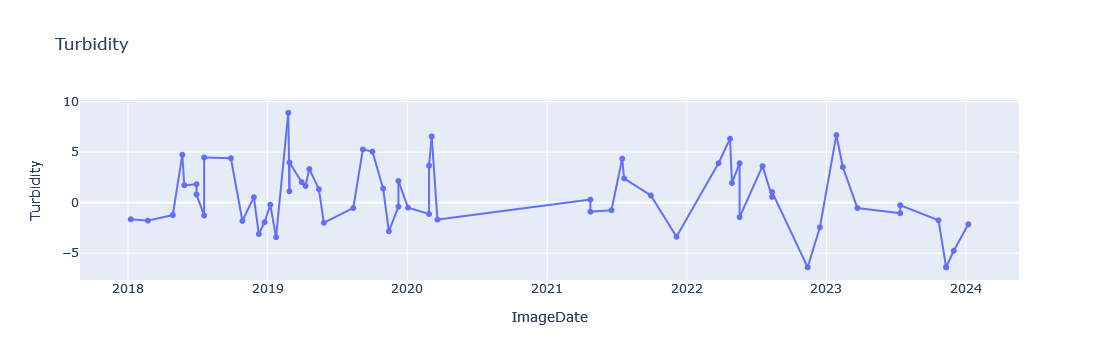

In [28]:
fig = px.line(result_N_O, x="ImageDate", y="Turbidity", markers=True, title="Turbidity")
fig.show()

# Calibration by using ratio

In [29]:
result_N_O["DOC_ratio"] = result_N_O["Result"]/result_N_O["DOC"]

In [30]:
a = result_N_O["DOC_ratio"].mean()
b = result_N_O["deltaDOC"].mean()
a

0.12238221309772412

In [31]:
result_N_O["calibratedDOC_delta"] = result_N_O["DOC"] - b


In [32]:
result_N_O["calibratedDOC_ratio"] = result_N_O["DOC"] * a


In [33]:
result_N_O1 = result_N_O[result_N_O['PointID'] == 'NW-88010015'] #NW-88021658 NW-88005133
result_N_O2 = result_N_O[result_N_O['PointID'] == 'NW-88005133'] #NW-88010015 NW-88021658
result_N_O3 = result_N_O[result_N_O['PointID'] == 'NW-88021658'] #NW-88010015 NW-88005133

In [34]:
rms_1 = root_mean_squared_error(result_N_O1["Result"],result_N_O1["calibratedDOC_ratio"])
rms_1

0.7422664790045163

In [35]:
rms_2 = root_mean_squared_error(result_N_O2["Result"],result_N_O2["calibratedDOC_ratio"])
rms_2

0.8593983401579495

In [36]:
rms_3 = root_mean_squared_error(result_N_O3["Result"],result_N_O3["calibratedDOC_ratio"])
rms_3

1.334697382755237

In [37]:
rms = root_mean_squared_error(result_N_O["Result"],result_N_O["calibratedDOC_ratio"])
rms

0.9329397999029003

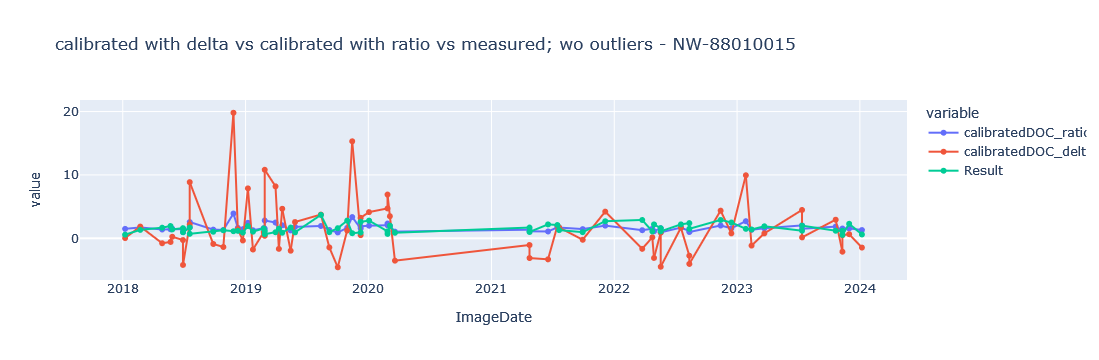

In [38]:
fig = px.line(result_N_O, x="ImageDate", y=["calibratedDOC_ratio","calibratedDOC_delta","Result"], markers=True,title="calibrated with delta vs calibrated with ratio vs measured; wo outliers - NW-88010015")
fig.show()

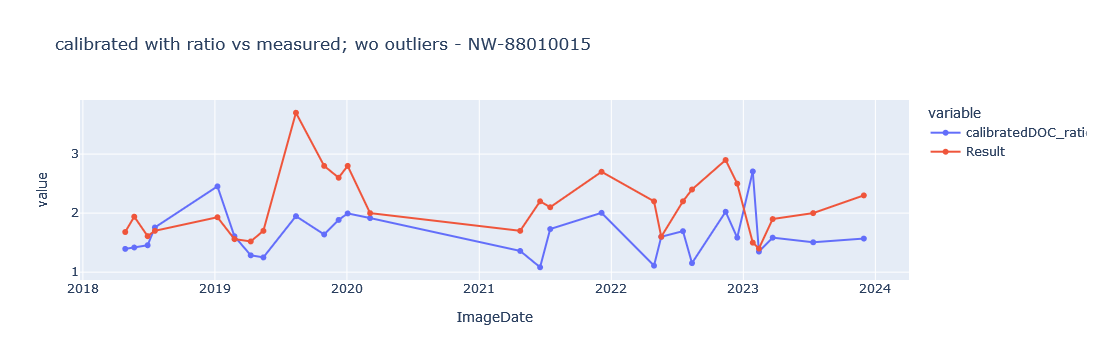

In [39]:
fig = px.line(result_N_O1, x="ImageDate", y=["calibratedDOC_ratio","Result"], markers=True,title="calibrated with ratio vs measured; wo outliers - NW-88010015")
fig.show()

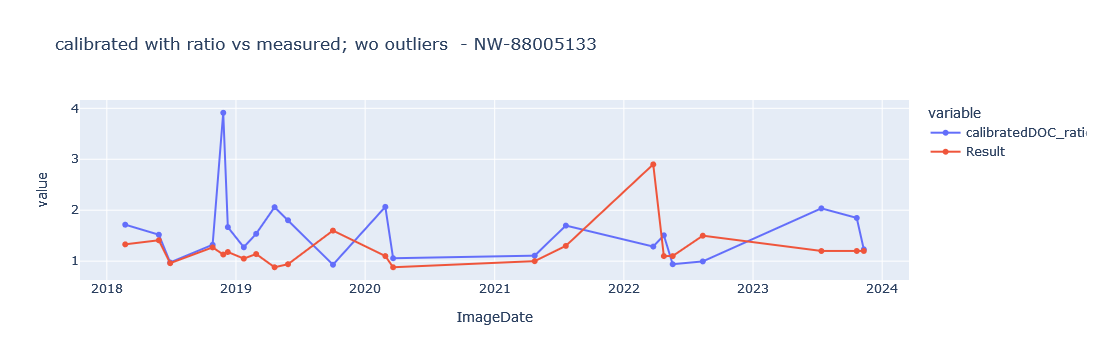

In [40]:
fig = px.line(result_N_O2, x="ImageDate", y=["calibratedDOC_ratio","Result"], markers=True,title="calibrated with ratio vs measured; wo outliers  - NW-88005133")
fig.show()

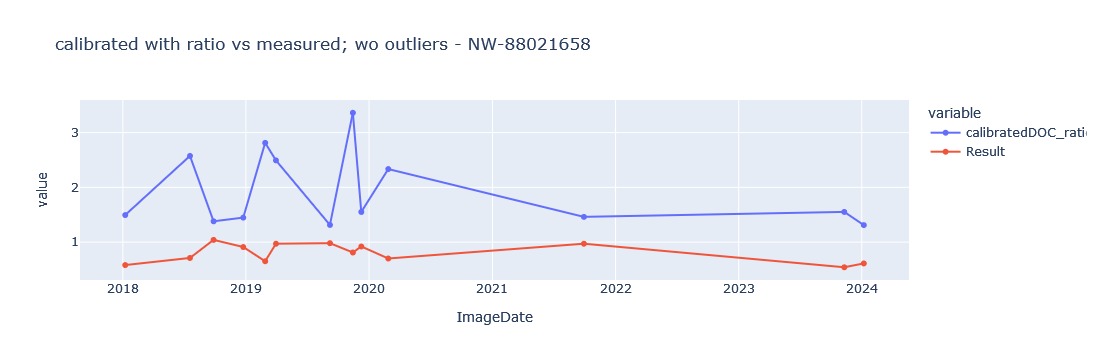

In [41]:
fig = px.line(result_N_O3, x="ImageDate", y=["calibratedDOC_ratio","Result"], markers=True,title="calibrated with ratio vs measured; wo outliers - NW-88021658")
fig.show()

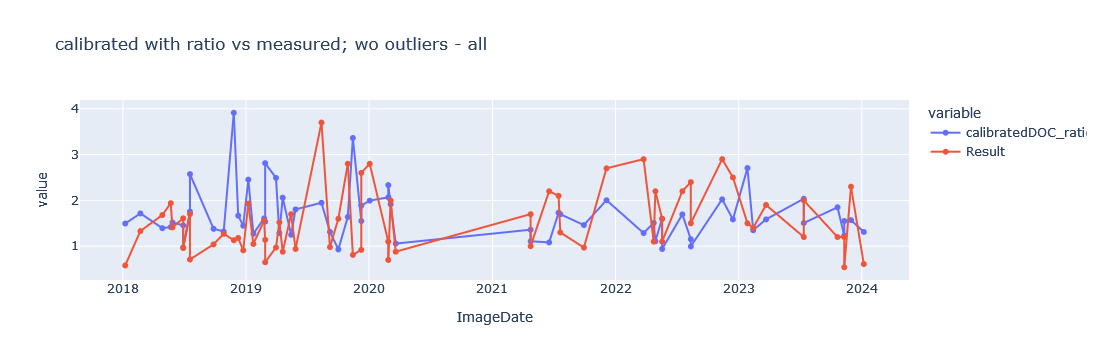

In [42]:
fig = px.line(result_N_O, x="ImageDate", y=["calibratedDOC_ratio","Result"], markers=True,title="calibrated with ratio vs measured; wo outliers - all")
fig.show()

# Calibration using Linear regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
x=result_N_O.loc[:,"DOC"].values
x = x.reshape((-1, 1))
y=result_N_O.loc[:,"Result"].values

In [45]:
model = LinearRegression().fit(x, y)

In [46]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.007323018066714093


In [47]:
print(f"intercept: {model.intercept_}")

intercept: 1.716435742198019


In [48]:
print(f"slope: {model.coef_}")

slope: [-0.01301728]


In [49]:
y_pred = model.predict(x)

In [50]:
y_pred

array([1.55749877, 1.5339105 , 1.56817163, 1.56559939, 1.55486894,
       1.56162411, 1.61277419, 1.52956569, 1.44265842, 1.56968996,
       1.5758908 , 1.30022826, 1.53906766, 1.56250787, 1.4554881 ,
       1.58104249, 1.5454076 , 1.55291347, 1.41723115, 1.45135528,
       1.57970248, 1.49735858, 1.58347274, 1.52464699, 1.50920893,
       1.57674665, 1.61753076, 1.54213663, 1.35875728, 1.55151188,
       1.51596376, 1.50424036, 1.49667765, 1.46817947, 1.51261943,
       1.60401164, 1.57183865, 1.59863565, 1.60126602, 1.53242077,
       1.53576337, 1.5610497 , 1.50319028, 1.57965278, 1.55602651,
       1.59841827, 1.54631488, 1.61649261, 1.53622629, 1.5938097 ,
       1.61063479, 1.50123396, 1.54790236, 1.42856033, 1.57296227,
       1.54791489, 1.49985735, 1.55625504, 1.51978626, 1.5854831 ,
       1.55145903, 1.54956013, 1.57702549])

In [51]:
result_N_O["calibratedDOC_reg"] = y_pred

In [52]:
result_N_O

,PointID,Property,Result,Unit,SampleDate,latitude,longitude,DOC,Turbidity,NDVI,Chlorophyll,CDOM,ImageDate,deltaDOC,DOC_ratio,calibratedDOC_delta,calibratedDOC_ratio,calibratedDOC_reg
0,NW-88021658,C - Org Filt,0.58,mg/l,2018-01-11,54.426701,-3.319169,12.209693,-1.642173,-0.173773,0.437880,5.072304,2018-01-08,11.629693,0.047503,0.047497,1.494249,1.557499
1,NW-88005133,C - Org Filt,1.33,mg/l,2018-02-22,54.519881,-3.372862,14.021768,-1.776840,0.215351,0.432614,6.075563,2018-02-22,12.691768,0.094853,1.859571,1.716015,1.533910
5,NW-88010015,C - Org Filt,1.68,mg/l,2018-04-26,54.655347,-3.221301,11.389794,-1.225528,-0.242753,0.497947,4.621555,2018-04-28,9.709794,0.147500,-0.772403,1.393908,1.568172
7,NW-88010015,C - Org Filt,1.94,mg/l,2018-05-23,54.655347,-3.221301,11.587396,4.744822,-0.164305,10.217097,4.726666,2018-05-23,9.647396,0.167423,-0.574800,1.418091,1.565599
8,NW-88005133,C - Org Filt,1.41,mg/l,2018-05-25,54.519881,-3.372862,12.411719,1.722455,0.180321,2.936020,5.172604,2018-05-28,11.001719,0.113602,0.249523,1.518974,1.554869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,NW-88005133,C - Org Filt,1.20,mg/l,2023-10-20,54.519881,-3.372862,15.106806,-1.736542,0.014442,0.329273,6.686809,2023-10-21,13.906806,0.079434,2.944609,1.848804,1.519786
78,NW-88005133,C - Org Filt,1.20,mg/l,2023-11-07,54.519881,-3.372862,10.059910,-6.390000,1.000000,0.000000,3.946575,2023-11-10,8.859910,0.119285,-2.102286,1.231154,1.585483
79,NW-88021658,C - Org Filt,0.54,mg/l,2023-11-10,54.426701,-3.319169,12.673672,-6.390000,0.821418,0.000000,5.329158,2023-11-10,12.133672,0.042608,0.511476,1.551032,1.551459
80,NW-88010015,C - Org Filt,2.30,mg/l,2023-11-28,54.655347,-3.221301,12.819548,-4.750050,-1.000000,0.005956,5.393915,2023-11-30,10.519548,0.179414,0.657351,1.568885,1.549560


In [53]:
result_N_O1 = result_N_O[result_N_O['PointID'] == 'NW-88010015'] #NW-88021658 NW-88005133
result_N_O2 = result_N_O[result_N_O['PointID'] == 'NW-88005133'] #NW-88010015 NW-88021658
result_N_O3 = result_N_O[result_N_O['PointID'] == 'NW-88021658'] #NW-88010015 NW-88005133

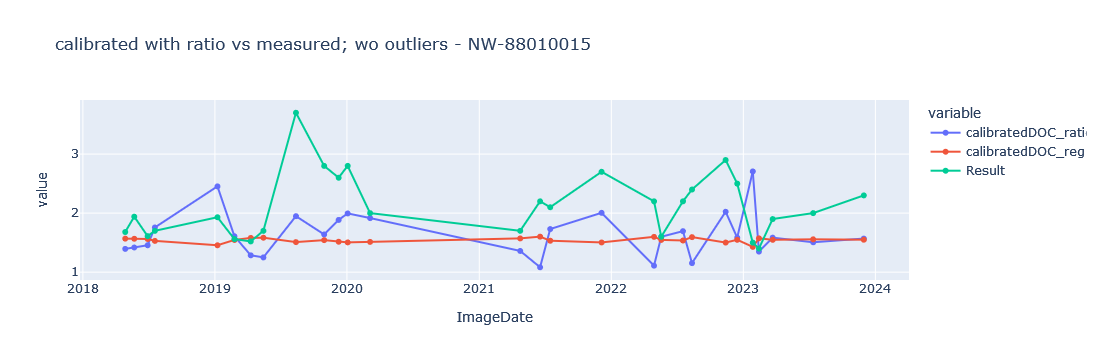

In [54]:
fig = px.line(result_N_O1, x="ImageDate", y=["calibratedDOC_ratio","calibratedDOC_reg","Result"], markers=True,title="calibrated with ratio vs measured; wo outliers - NW-88010015")
fig.show()

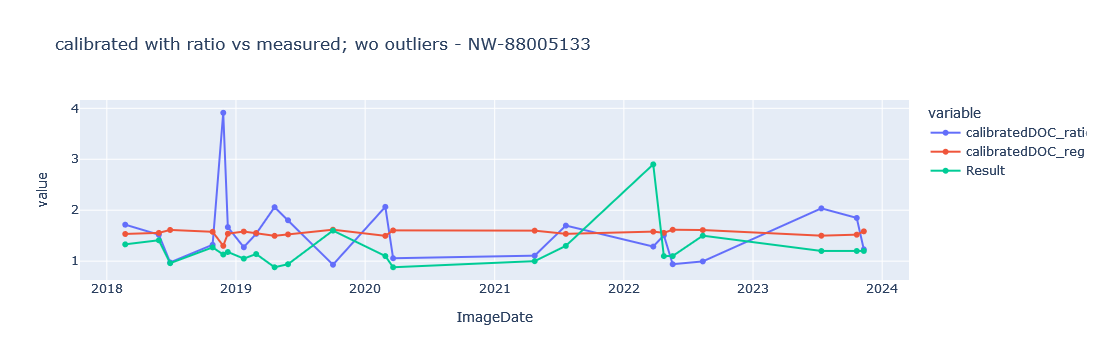

In [55]:
fig = px.line(result_N_O2, x="ImageDate", y=["calibratedDOC_ratio","calibratedDOC_reg","Result"], markers=True,title="calibrated with ratio vs measured; wo outliers - NW-88005133")
fig.show()

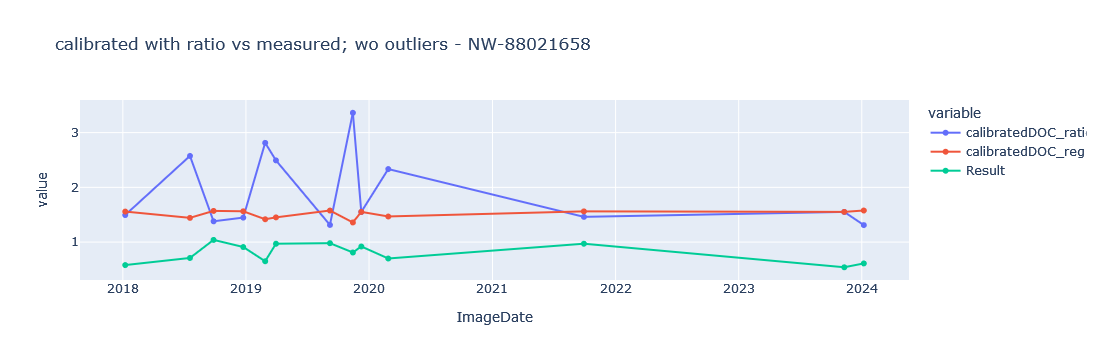

In [56]:
fig = px.line(result_N_O3, x="ImageDate", y=["calibratedDOC_ratio","calibratedDOC_reg","Result"], markers=True,title="calibrated with ratio vs measured; wo outliers - NW-88021658")
fig.show()

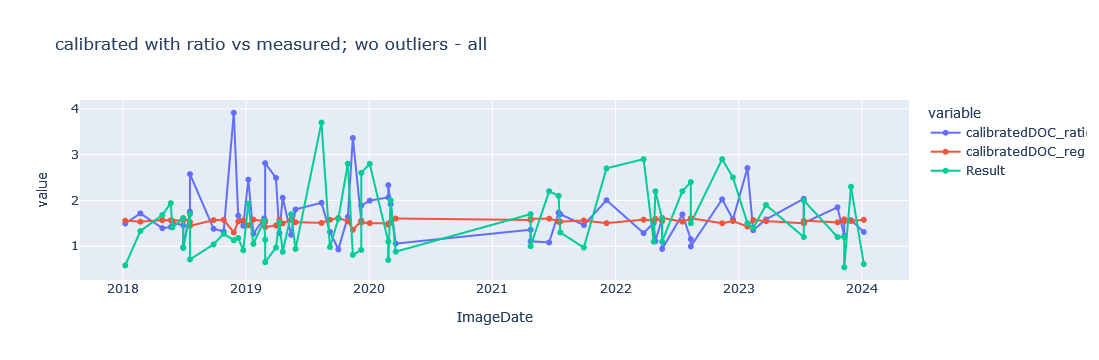

In [57]:
fig = px.line(result_N_O, x="ImageDate", y=["calibratedDOC_ratio","calibratedDOC_reg","Result"], markers=True,title="calibrated with ratio vs measured; wo outliers - all")
fig.show()

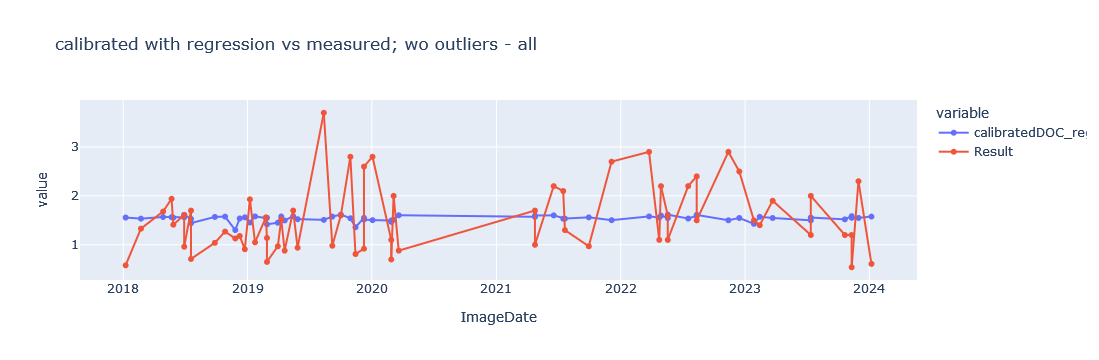

In [58]:
fig = px.line(result_N_O, x="ImageDate", y=["calibratedDOC_reg","Result"], markers=True,title="calibrated with regression vs measured; wo outliers - all")
fig.show()

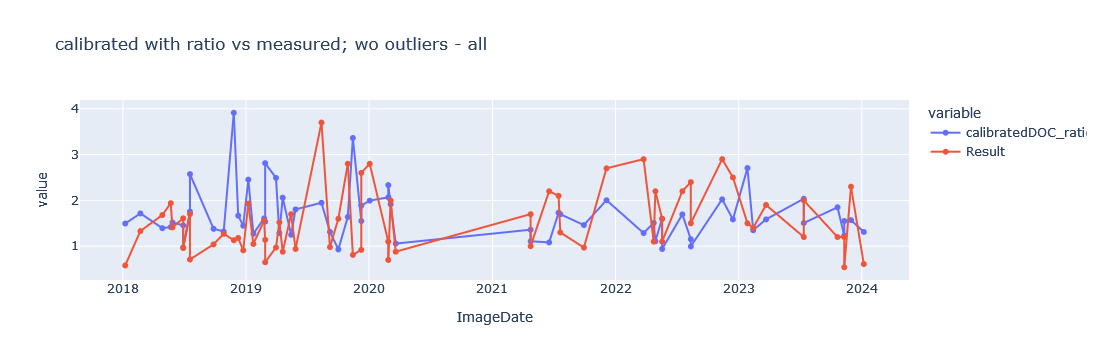

In [59]:
fig = px.line(result_N_O, x="ImageDate", y=["calibratedDOC_ratio","Result"], markers=True,title="calibrated with ratio vs measured; wo outliers - all")
fig.show()

In [60]:
rms_ratio = root_mean_squared_error(result_N_O["Result"],result_N_O["calibratedDOC_ratio"])
print(f"rms for ratio: {rms_ratio}")

rms for ratio: 0.9329397999029003


In [61]:
rms_reg = root_mean_squared_error(result_N_O["Result"],result_N_O["calibratedDOC_reg"])
print(f"rms for regression: {rms_reg}")

rms for regression: 0.6880150137832137


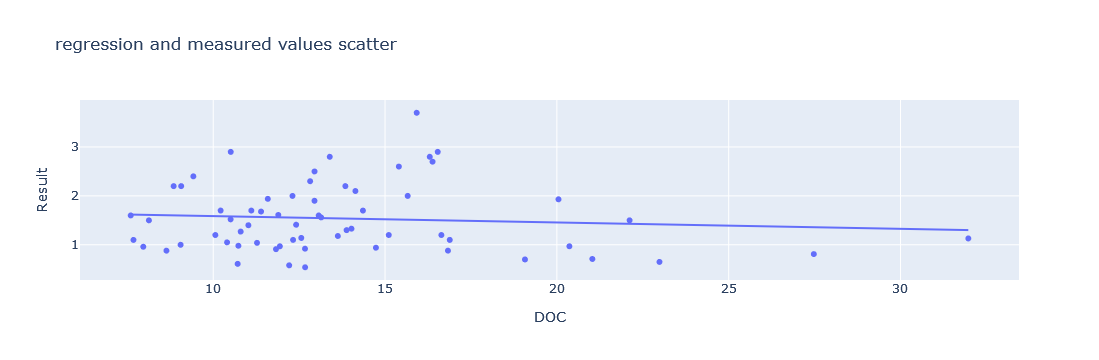

In [62]:
fig = px.scatter(result_N_O, x="DOC", y="Result",title="regression and measured values scatter",trendline="ols")
fig.show()

# Save new file


In [63]:
result_N_O

,PointID,Property,Result,Unit,SampleDate,latitude,longitude,DOC,Turbidity,NDVI,Chlorophyll,CDOM,ImageDate,deltaDOC,DOC_ratio,calibratedDOC_delta,calibratedDOC_ratio,calibratedDOC_reg
0,NW-88021658,C - Org Filt,0.58,mg/l,2018-01-11,54.426701,-3.319169,12.209693,-1.642173,-0.173773,0.437880,5.072304,2018-01-08,11.629693,0.047503,0.047497,1.494249,1.557499
1,NW-88005133,C - Org Filt,1.33,mg/l,2018-02-22,54.519881,-3.372862,14.021768,-1.776840,0.215351,0.432614,6.075563,2018-02-22,12.691768,0.094853,1.859571,1.716015,1.533910
5,NW-88010015,C - Org Filt,1.68,mg/l,2018-04-26,54.655347,-3.221301,11.389794,-1.225528,-0.242753,0.497947,4.621555,2018-04-28,9.709794,0.147500,-0.772403,1.393908,1.568172
7,NW-88010015,C - Org Filt,1.94,mg/l,2018-05-23,54.655347,-3.221301,11.587396,4.744822,-0.164305,10.217097,4.726666,2018-05-23,9.647396,0.167423,-0.574800,1.418091,1.565599
8,NW-88005133,C - Org Filt,1.41,mg/l,2018-05-25,54.519881,-3.372862,12.411719,1.722455,0.180321,2.936020,5.172604,2018-05-28,11.001719,0.113602,0.249523,1.518974,1.554869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,NW-88005133,C - Org Filt,1.20,mg/l,2023-10-20,54.519881,-3.372862,15.106806,-1.736542,0.014442,0.329273,6.686809,2023-10-21,13.906806,0.079434,2.944609,1.848804,1.519786
78,NW-88005133,C - Org Filt,1.20,mg/l,2023-11-07,54.519881,-3.372862,10.059910,-6.390000,1.000000,0.000000,3.946575,2023-11-10,8.859910,0.119285,-2.102286,1.231154,1.585483
79,NW-88021658,C - Org Filt,0.54,mg/l,2023-11-10,54.426701,-3.319169,12.673672,-6.390000,0.821418,0.000000,5.329158,2023-11-10,12.133672,0.042608,0.511476,1.551032,1.551459
80,NW-88010015,C - Org Filt,2.30,mg/l,2023-11-28,54.655347,-3.221301,12.819548,-4.750050,-1.000000,0.005956,5.393915,2023-11-30,10.519548,0.179414,0.657351,1.568885,1.549560


In [68]:
result = result_N_O.drop(columns=['deltaDOC', 'DOC_ratio','calibratedDOC_delta'])

In [69]:
title = "data_processed"
result.to_csv(title+'.csv', index=False)  